In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [34]:
# We first define a mean and covariance function
from kernels import get_periodic, get_exponentiated_quadratic

mu_func = lambda x : 3.0  # approx the mean of the data
# K_func = get_exponentiated_quadratic(1, 1)
K_func = get_periodic(1.5, 1000, 1000)

In [37]:
# Sample from the Gaussian process distribution
nb_of_samples = 100  # Number of points in each function
n_draws = 3  # Number of functions to sample

# Independent variable samples
X = np.linspace(0, 7000, nb_of_samples)

mu = np.array([mu_func(x) for x in X])
K = K_func(X, X)  # Kernel of data points

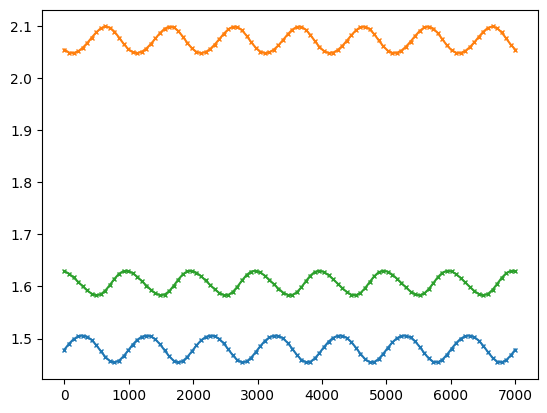

In [38]:
# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=mu,
    cov=K, 
    size=n_draws
)

for i in range(n_draws):
    plt.plot(X, ys[i], marker='x', markersize=3)

In [235]:
from gp_utils import GP

# Draw some training data
x_d = np.concatenate(
    [np.arange(0, 3, 0.25),
    np.arange(6,10,0.25)]
)
y_d = 3 + np.sin(x_d * 2 * np.pi / 3)

# Evaluate GP a regular points
x_star = np.linspace(0.1,9.9,100)
mu, K = GP(x_d, y_d, x_star, mu_func, K_func, sigma_squared=0.1)

(28, 100)


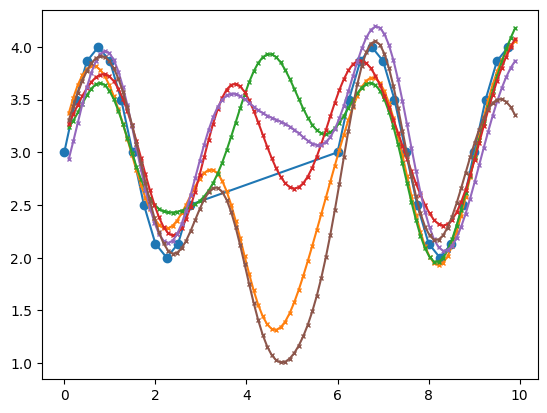

In [236]:
# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=mu,
    cov=K, 
    size=n_draws
)

plt.plot(x_d, y_d, marker='o')

for i in range(n_draws):
    plt.plot(x_star, ys[i], marker='x', markersize=3)